# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Загрузка данных и предобработка - загрузите датасет так, чтобы нулевой столбец выступал в качестве индекса датафрейма. Посмотрите на его `head` и `tail`. Похоже, у нас есть одна лишняя переменная - `id`, которая совершенно не информативна и будет нам только мешать, давайте сразу её уберем.
2. [1 балл] Какое среднее число лайков в датасете? А медианное?
3. [1 балл] Какой источник (автор) создал больше всего мемов? 
4. [2 балла] Создайте переменные, отвечающие за месяц, день, час и день недели, в которые мем появлялся. В какой год было создано больше всего мемов? 
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [3 балла] Похоже, что наши созданные переменные не очень хорошо смотреть на одном общем графике. Давайте потсроим отдельные для каждого. Постройте гистограмму для месяца выхода мема, указав число число разбиений равное 12 (по количеству месяцев в году). В какой месяц наплодили максимальное число мемов? Почему? Теперь постройте гистограмму для часа дня, указав логичное число разбиений. Как вы можете объяснить получившийся вид графика?
7. [1 балл] Вопрос-сюрприз! Попробуйте самостоятельно придумать какой-нибудь осмысленный вопрос для вашего датасета и ответьте на  него. Инициатива не наказуема ;)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
Trump = pd.read_csv('Evseev_Vladislav_Trump.csv', index_col = 0)

In [54]:
Trump.head()

,timestamp,id,link,caption,author,network,likes
0,8/1/16 20:56,1742494,http://imgur.com/a/lNHED,"Son killed by\n country, in a\n in a\n war sta...",forwardsfromgrandma,imgur,-20
1,6/8/16 1:38,741754,http://imgur.com/qkpY5by,THERE'S ONLY ONE GENDER\n TRUMP IS A HERO\n VE...,shittyadviceanimals,imgur,-18
2,9/5/16 13:51,2278706,http://imgur.com/a/Cm6ls,"TRUMP LOVES TRUMP, AND\n DOES WHAT HIS FOLLOWE...",politicalhumor,imgur,-17
3,9/27/16 23:21,2576782,http://imgur.com/X6zBaIM,Hey Trump! How did you cacth\n up to me in the...,politicalhumor,imgur,-14
4,4/20/16 20:07,316381,http://imgur.com/LgPKrP1,WANTED TRUMP FOR\n PRESIDENT\n TRUMPIKICKED HI...,NaN,imgur,-14


In [55]:
Trump.tail()

,timestamp,id,link,caption,author,network,likes
15888,4/14/16 10:44,260974,https://instagram.com/p/BELYHjLzg5b,like for justin\n ignore for donald trump,1599034994,instagram,179247
15889,1/7/16 17:39,619599,https://instagram.com/p/BAPxuKMjbCU,Who's more presidential?\n LIKE DJ Khaled\n IG...,1160610875,instagram,189256
15890,4/4/16 1:47,146633,https://instagram.com/p/BDwqwD-FXhZ,"I'm just saying, if trump wins were\n doomed!\...",1419706373,instagram,203460
15891,1/30/16 11:47,801619,https://instagram.com/p/BBKXt5yCbtt,Who would be a better\n president\n Like Potat...,1476135621,instagram,215972
15892,10/13/16 22:04,2944701,https://instagram.com/p/BLhOm04jUwD,isteal Tweets\n @ich Arnold\n If Donald Trump ...,1419706373,instagram,272678


In [56]:
# выкидываем лишнюю переменную
Trump = Trump.drop(['id'], axis=1)

In [57]:
Trump.likes. mean()

1522.4004278613227

In [58]:
Trump.likes.median()

42.0

In [59]:
Trump. author. mode()

0    politicalhumor
dtype: object

In [60]:
# переводим таймстэмпы в формат datetime, чтобы с ними было удобнее работать в дальнейшем
Trump['timestamp'] = Trump.timestamp.apply(lambda x: pd.to_datetime(x))

In [61]:
# создаем переменную "год", в который вышел мемчик
Trump['Year'] = Trump.timestamp.apply(lambda x: x.year)

# аналогично создайте переменные Month, Day, Hour, Weekday
Trump['Month'] = Trump.timestamp.apply(lambda x: x.month)
Trump['Day'] = Trump.timestamp.apply(lambda x: x.day)
Trump['Hour'] = Trump.timestamp.apply(lambda x: x.hour)
Trump['Weekday'] = Trump.timestamp.apply(lambda x: x.weekday)

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC019B9DD8>,
      dtype=object)

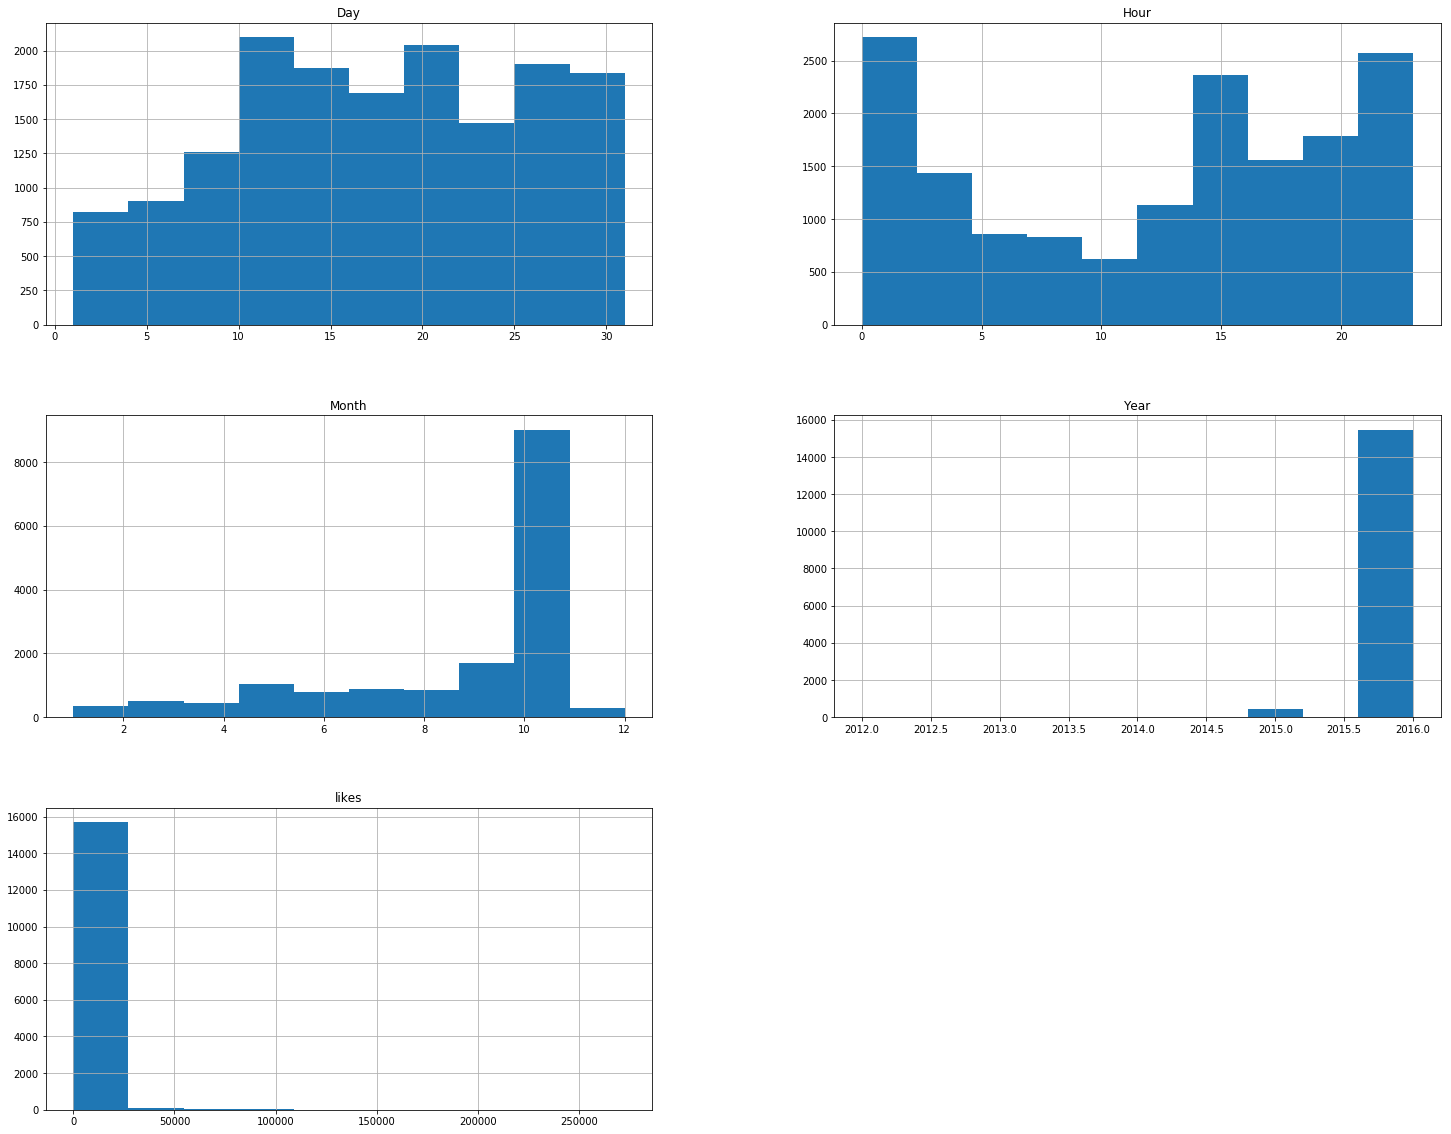

In [62]:
fig = plt.figure(figsize = (25,20)) 
ax = fig.gca() 
Trump.hist(ax = ax)

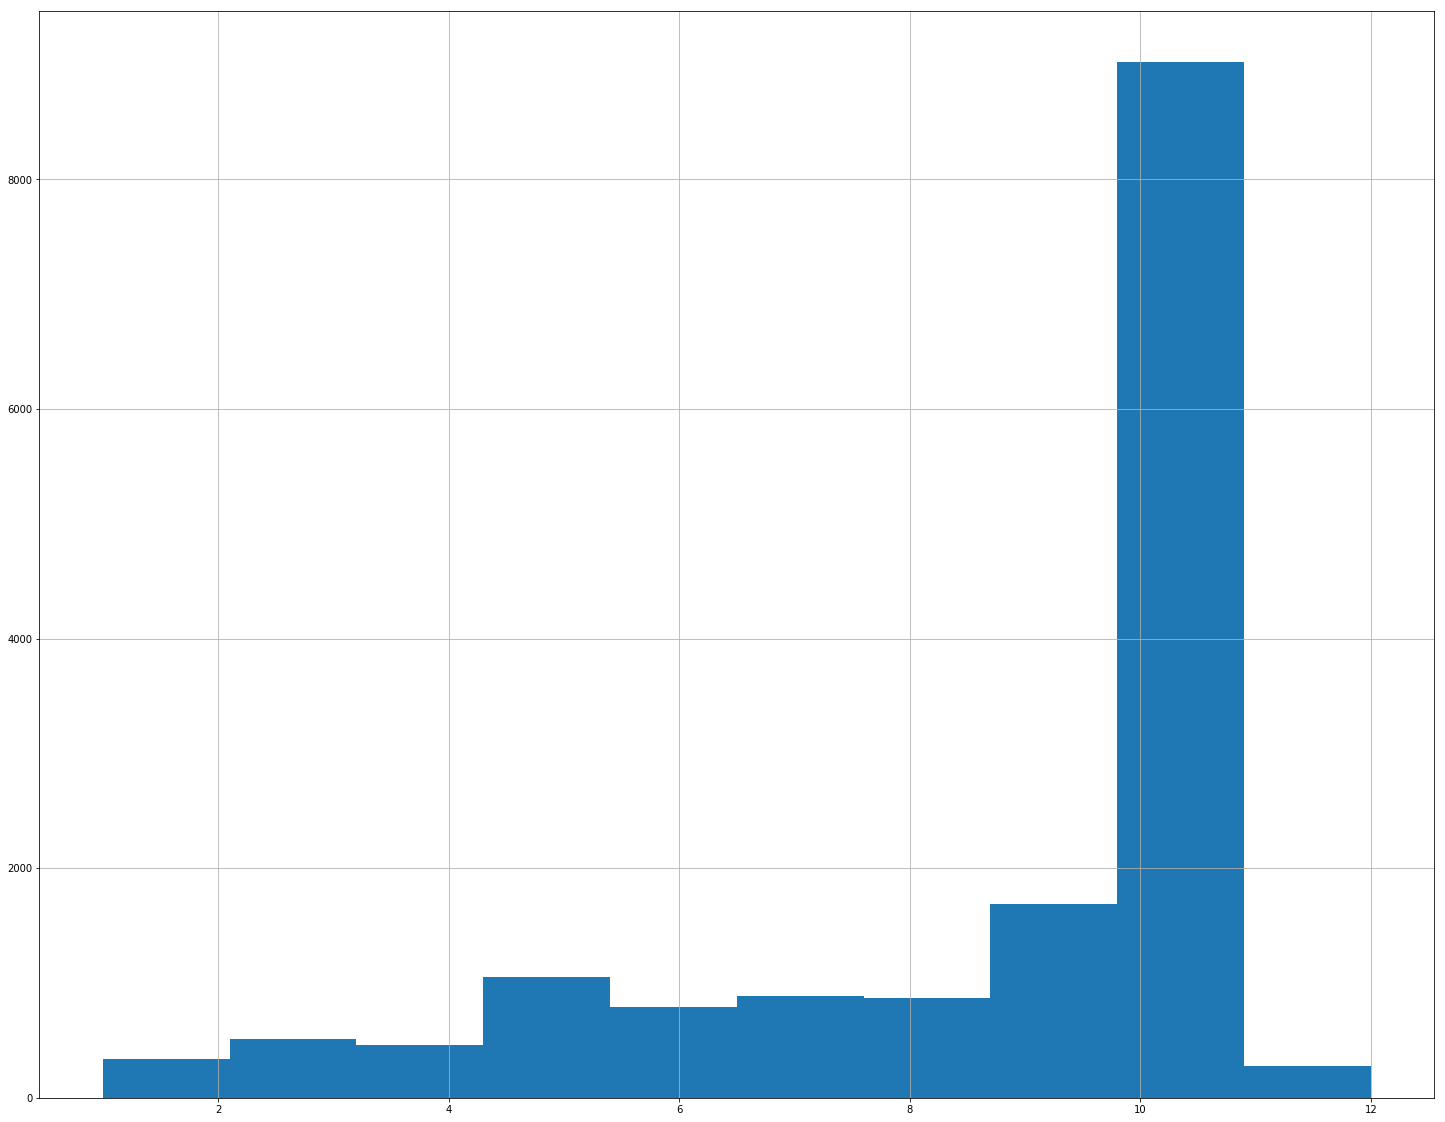

In [63]:
fig = plt.figure(figsize = (25,20)) 
ax = fig.gca() 
Trump['Month'].hist(ax = ax )

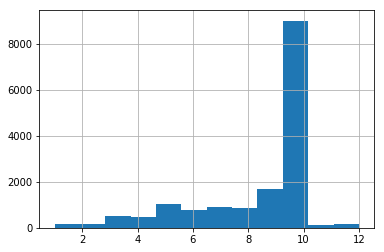

In [64]:
Trump['Month'].hist(bins=12)

<STRONG>Какое максимальное количество лайков получила запись<STRONG>

In [65]:
Trump.likes.max()

272678

In [66]:
Trump.isnull().sum()

timestamp      0
link           0
caption        0
author       210
network        0
likes          0
Year           0
Month          0
Day            0
Hour           0
Weekday        0
dtype: int64

In [67]:
Trump.head()

,timestamp,link,caption,author,network,likes,Year,Month,Day,Hour,Weekday
0,2016-08-01 20:56:00,http://imgur.com/a/lNHED,"Son killed by\n country, in a\n in a\n war sta...",forwardsfromgrandma,imgur,-20,2016,8,1,20,<built-in method weekday of Timestamp object a...
1,2016-06-08 01:38:00,http://imgur.com/qkpY5by,THERE'S ONLY ONE GENDER\n TRUMP IS A HERO\n VE...,shittyadviceanimals,imgur,-18,2016,6,8,1,<built-in method weekday of Timestamp object a...
2,2016-09-05 13:51:00,http://imgur.com/a/Cm6ls,"TRUMP LOVES TRUMP, AND\n DOES WHAT HIS FOLLOWE...",politicalhumor,imgur,-17,2016,9,5,13,<built-in method weekday of Timestamp object a...
3,2016-09-27 23:21:00,http://imgur.com/X6zBaIM,Hey Trump! How did you cacth\n up to me in the...,politicalhumor,imgur,-14,2016,9,27,23,<built-in method weekday of Timestamp object a...
4,2016-04-20 20:07:00,http://imgur.com/LgPKrP1,WANTED TRUMP FOR\n PRESIDENT\n TRUMPIKICKED HI...,NaN,imgur,-14,2016,4,20,20,<built-in method weekday of Timestamp object a...


In [68]:
#выкидываем не нужные данные
Trump = Trump.drop(['link'], axis=1)
Trump = Trump.drop(['timestamp'], axis=1)
Trump = Trump.drop(['author'], axis=1)
Trump = Trump.drop(['network'], axis=1)
Trump = Trump.drop(['Year'], axis=1)

In [69]:
Trump = Trump.drop(['Month'], axis=1)
Trump = Trump.drop(['Day'], axis=1)
Trump = Trump.drop(['Hour'], axis=1)
Trump = Trump.drop(['Weekday'], axis=1)

In [70]:
# еще раз взглянем на начало датасет
Trump.head()

,caption,likes
0,"Son killed by\n country, in a\n in a\n war sta...",-20
1,THERE'S ONLY ONE GENDER\n TRUMP IS A HERO\n VE...,-18
2,"TRUMP LOVES TRUMP, AND\n DOES WHAT HIS FOLLOWE...",-17
3,Hey Trump! How did you cacth\n up to me in the...,-14
4,WANTED TRUMP FOR\n PRESIDENT\n TRUMPIKICKED HI...,-14


In [71]:
Trump['caption'] = Trump['caption'].str.lower()

In [72]:
# импортируем нужный нам метод
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
# объявляем его
tf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.001, norm='l2', stop_words='english')

In [74]:
# выбираем для нашей матрицы признаков ТОЛЬКО столбец с текстом
X = Trump['caption']

In [75]:
# импортим пакет для работы с матрицами
import numpy as np

In [76]:
import matplotlib.pyplot as plt   # уже смутно знакомый вам пакет для картинок :3
import seaborn as sns             # ещё один пакет для картинок 

%matplotlib inline

In [77]:
# так как мы хотим прологарифмировать лайки, нам надо сделать так, чтобы среди них не было отрицательных чисел и равных нулю
Trump.dropna(subset=['likes'], inplace = True)
Trump['likes'] = np.log(Trump['likes'] + np.abs(Trump['likes'].min()) +1)

In [78]:
# выбираем целевую переменную
y = Trump['likes']

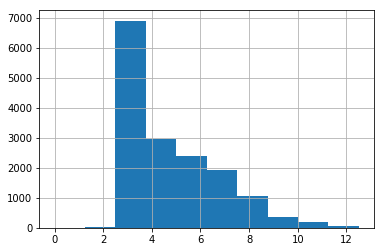

In [79]:
# построим лайковую гистограмму
Trump.likes.hist()

In [80]:
# прогоняем через преобразование и получаем готовую матрицу признаков
X = tf_vectorizer.fit_transform(X)

In [81]:
# Теперь делим данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [83]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11125, 5770)
(4768, 5770)
(11125,)
(4768,)


In [84]:
# импортим случайный лес и объявляем его
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf = RandomForestRegressor()

In [86]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

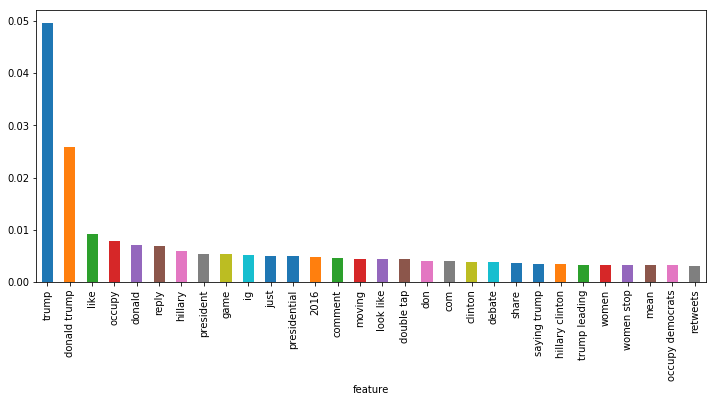

In [87]:
# Пытаемся  посмотреть на важность слов
featureImportance = pd.DataFrame({"feature": tf_vectorizer.get_feature_names(), 
                                  "importance": rf.feature_importances_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(12,5))

In [88]:
# посмотрим регрессионные метрики
from sklearn import metrics

def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  metrics.r2_score(y_test, y_pred))

In [89]:
y_mean = np.mean(y_train)                     
y_pred_naive = np.ones(len(y_test)) * y_mean  
y_pred_naive[:5]

array([4.79623233, 4.79623233, 4.79623233, 4.79623233, 4.79623233])

In [90]:
print_metrics(y_test, y_pred_naive)

MAE: 1.5829219318959395
RMSE: 1.9071069955471693
R2: -0.00011325387473015702


In [91]:
y_pred = rf.predict(X_test)

In [92]:
print_metrics(y_test, y_pred)

MAE: 1.4045577928827182
RMSE: 1.8738361114764297
R2: 0.03447778041501992


In [93]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
y_pred_regr = model_regression.predict(X_test)

In [94]:
print_metrics(y_test, y_pred_regr)

MAE: 2.068952625312374
RMSE: 2.791359778601938
R2: -1.1425486745197522


In [95]:
from sklearn.linear_model import Ridge
model_regression = Ridge() 
model_regression.fit(X_train, y_train)
y_pred_regr = model_regression.predict(X_test)
print_metrics(y_test, y_pred_regr)

MAE: 1.4051461004497587
RMSE: 1.7791870174988813
R2: 0.12955313358550125


In [96]:
featureImportance = pd.DataFrame({"feature": tf_vectorizer.get_feature_names(), 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)

In [97]:
def plotImportance(featureImportance, top_words=20):
    """
        Plot importance of words in linear model
        
        featureImportance: pd.DataFrame
            data with coefs values
        
        top_words: int
            how many words to plot on both negative and positive sides
    """
    featureImportance = featureImportance.head(top_words).append(featureImportance.tail(top_words))
    x = np.arange(len(featureImportance))
    y = featureImportance.importance

    mask1 = y < 0
    mask2 = y >= 0

    plt.figure(figsize=(18, 8))
    plt.bar(x[mask1], y[mask1], color = 'red')
    plt.bar(x[mask2], y[mask2], color = 'blue')
    plt.xticks(np.arange(len(featureImportance)), 
                   featureImportance.index, rotation=90, ha="right", fontsize=11)
    plt.show()

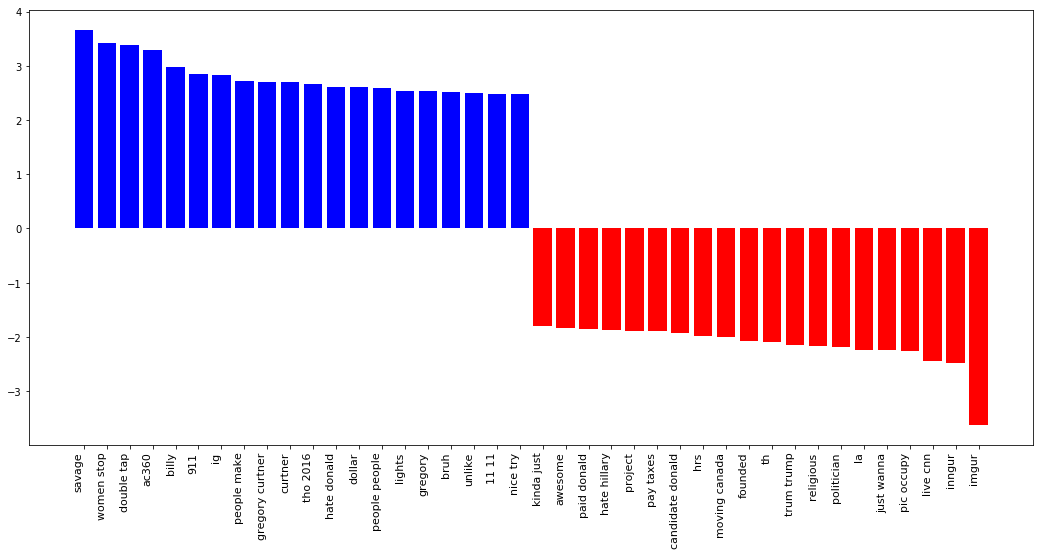

In [98]:
plotImportance(featureImportance)